In [3]:
%pip install mlxtend --upgrade
import math
import nltk
import pandas as pd  
import numpy as np  
import re 
import matplotlib.pyplot as plt 
from nltk.corpus import gutenberg
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from mlxtend.evaluate import bias_variance_decomp
from sklearn import preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.0 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [4]:
nltk.download("stopwords")
nltk.download("wordnet")
print(stopwords.words('english'))
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
from urllib import request

url1 = "https://www.gutenberg.org/files/25500/25500-8.txt"          #  A London Life  by Henry James:
url2 = "https://www.gutenberg.org/files/47873/47873-8.txt"      #  Malay Magic by  Walter William Skeat
url3 = "https://www.gutenberg.org/files/70675/70675-0.txt"      #  Chicago by day and night by Anonymous
url4 = "https://www.gutenberg.org/files/40549/40549-0.txt"             #  The Private Life of the Romans by Harold Whetstone Johnston
url5 = "https://www.gutenberg.org/files/41751/41751-8.txt"      #  Travels in Central Asia  by  Arminius Vámbéry

urls = [url1 ,url2 ,url3, url4 ,url5]
Books_names = ["Travels in Central Asia" ," Chicago by day and night" , "A London Life"  , "Malay Magic " ,"The Picture of Dorian Gray"]
Books_label = [ 'a' ,'b' ,'c','d' ,'e']
Authors = ["Arminius Vámbéry" ,"Anonymous" ,"Henry James" , "Walter William Skeat" ," Harold Whetstone Johnston"]
Books_contents = []

for U  in urls :
  response = request.urlopen(U)
  raw = response.read().decode('iso-8859-1' )
  text= re.findall(r"[a-zA-Z]{3,}", raw)
  lemmatizer = WordNetLemmatizer()
  lst =[]
  for i in text:
    W = i.lower()
    w = lemmatizer.lemmatize(W)
    if w not in set(stopwords.words('english')):
      lst.append(str(w))
  Books_contents.append(lst)

    # make sure that all lists contain 100 word 
Books_contents_100 = []               
for i in Books_contents:
  l = i[0:(math.floor(len(i)/100)) * 100]
  Books_contents_100.append(l)



# combine all lists in one dataframe 
data = pd.DataFrame()

for i in range(len(Books_contents_100)):
    dic = {}

    lis =  [Books_contents_100[i][x:x+100] for x in range(0, len(Books_contents_100[i]), 100)]

    dic['index']= i  # refer to the number of the book 
    dic['Authors']= Authors[i]
    dic['title']= Books_names[i] # refer to the book name
    dic['label'] = Books_label[i]
    dic['100_Words'] = lis # the partition of 100 words
    df_0 = pd.DataFrame(dic)
    for i in range(len(df_0)):
      df_0["100_Words"][i] = " ".join(df_0["100_Words"][i])
    df = df_0[:200]
    data = data.append(df)

data = shuffle(data)

data.head()


<ipython-input-5-00ec0f84bad3>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0["100_Words"][i] = " ".join(df_0["100_Words"][i])
<ipython-input-5-00ec0f84bad3>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df)
<ipython-input-5-00ec0f84bad3>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0["100_Words"][i] = " ".join(df_0["100_Words"][i])
<ipython-input-5-00ec0f84bad3>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

,index,Authors,title,label,100_Words
192,2,Henry James,A London Life,c,mitten stand reason soon going find somebody e...
117,4,Harold Whetstone Johnston,The Picture of Dorian Gray,e,eye speechless admiration approaching latter d...
52,4,Harold Whetstone Johnston,The Picture of Dorian Gray,e,ancient fortification ruin city importance fac...
139,1,Anonymous,Chicago by day and night,b,without explanation arabic title perhaps worth...
141,0,Arminius Vámbéry,Travels in Central Asia,a,laura stopped colour risen lady davenant stare...



 The most frequent 50 words of book c



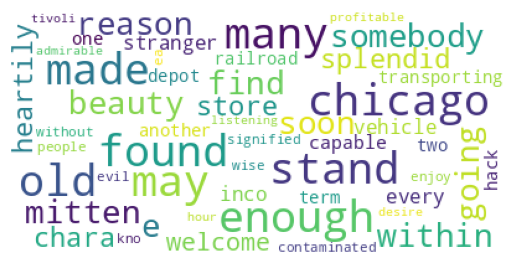


 The most frequent 50 words of book e



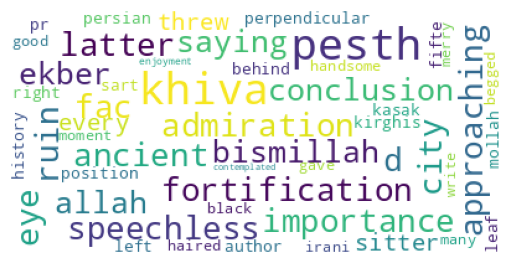


 The most frequent 50 words of book b



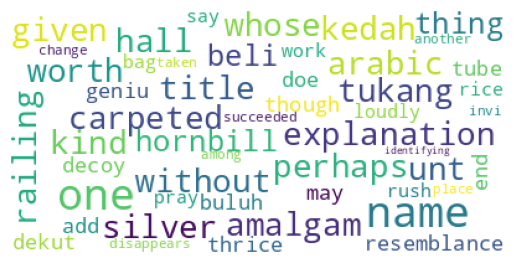


 The most frequent 50 words of book a



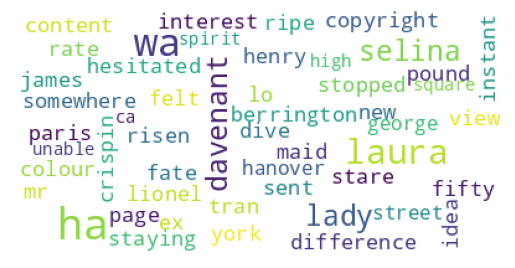


 The most frequent 50 words of book d



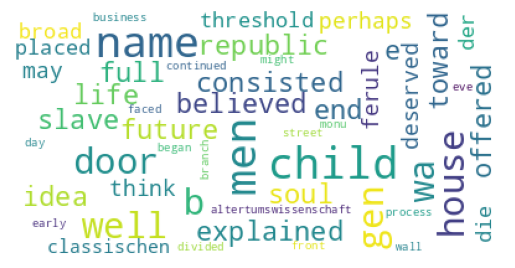

In [8]:
# plot word cloud for the most frequent 50 words in each book  
import wordcloud

for label in data['label'].unique():
  books = data[data["label"]==label]["100_Words"]

  #wordcloud 
  print(f"\n The most frequent 50 words of book {label}\n")
  wc = wordcloud.WordCloud(background_color='white', max_words=50, 
                          max_font_size=35)
  wc = wc.generate(str(books))
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()

##Feature Engineering`



##*   BOW
1.   Random forest
2.   KNN
3.   SVM
4.   XG-Boost
4.  Naive Bayes


##*   TF-IDF
1.   Random forest
2.   KNN
3.   SVM
4.   XG-Boost
4.  Naive Bayes


##*   N-Gram
1.   Random forest
2.   KNN
3.   SVM
4.   XG-Boost
4.  Naive Bayes










## Bag OF Words

In [9]:
count_Vec= CountVectorizer()
bow = count_Vec.fit_transform(data['100_Words'])
bow_df = pd.DataFrame(bow.toarray(), columns=count_Vec.get_feature_names_out())
bow_df

,abacus,abah,abandon,abandoned,abandonment,abashed,abbas,abbey,abbott,abbreviated,...,ziaret,zimmerman,zinde,zirab,zone,zonino,zoninus,zoological,zul,zum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = bow.toarray()
Y = data['label']

print(X.shape)
print(Y.shape)

# Split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

(1000, 13772)
(1000,)


In [40]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    
    _scoring = ['accuracy']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
    return {"Training Accuracy scores": results['train_accuracy'] ,
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
             
             "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
             
              }

In [41]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):      
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

##1-Random Forest Based on Bow

Accuracy: 0.9866666666666667
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.97142857, 0.98571429, 0.97857143, 0.96428571, 0.98571429]), 'Mean Validation Accuracy': 97.71428571428572}


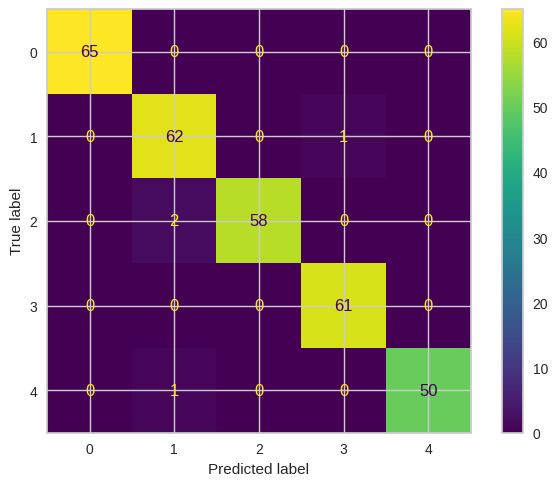

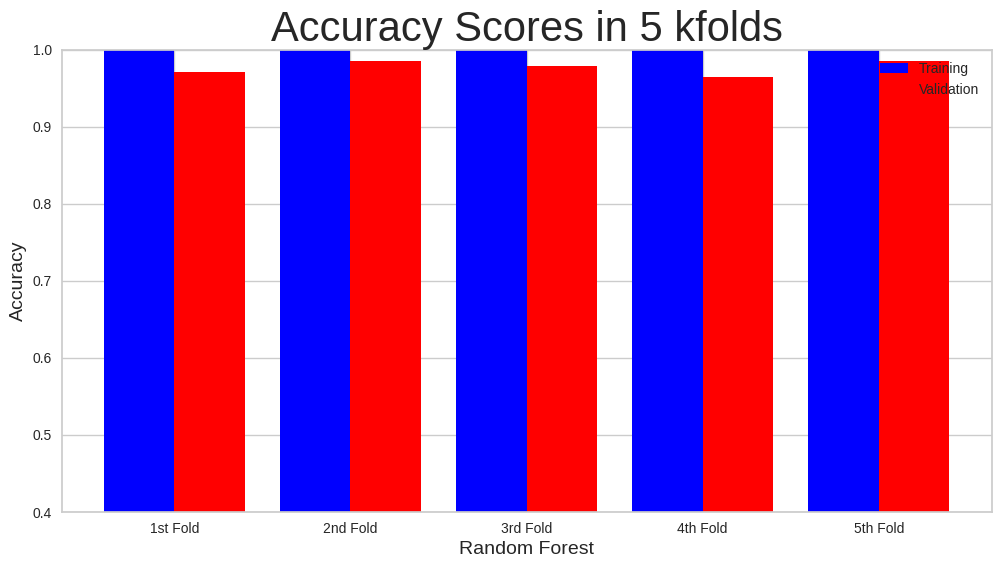

In [42]:
from numpy.ma.extras import average
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,  y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Random_forest_result = cross_validation(rf, X_train, y_train, 5)
print(Random_forest_result)
plot_result("Random Forest", "Accuracy", "Accuracy Scores in 5 kfolds", Random_forest_result['Training Accuracy scores'],  Random_forest_result['Validation Accuracy scores'])

## 2-Naive Bayes base on Bow

Accuracy: 0.9733333333333334
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.96428571, 1.        , 0.97857143, 0.97857143, 0.98571429]), 'Mean Validation Accuracy': 98.14285714285715}


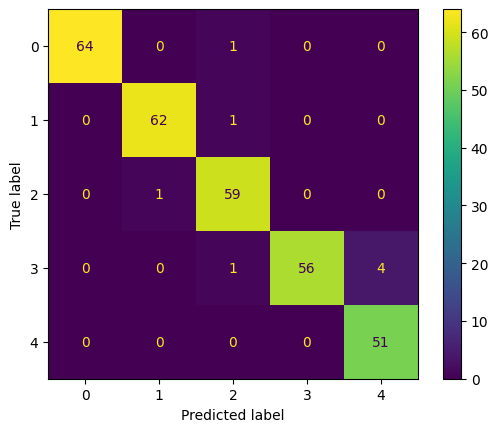

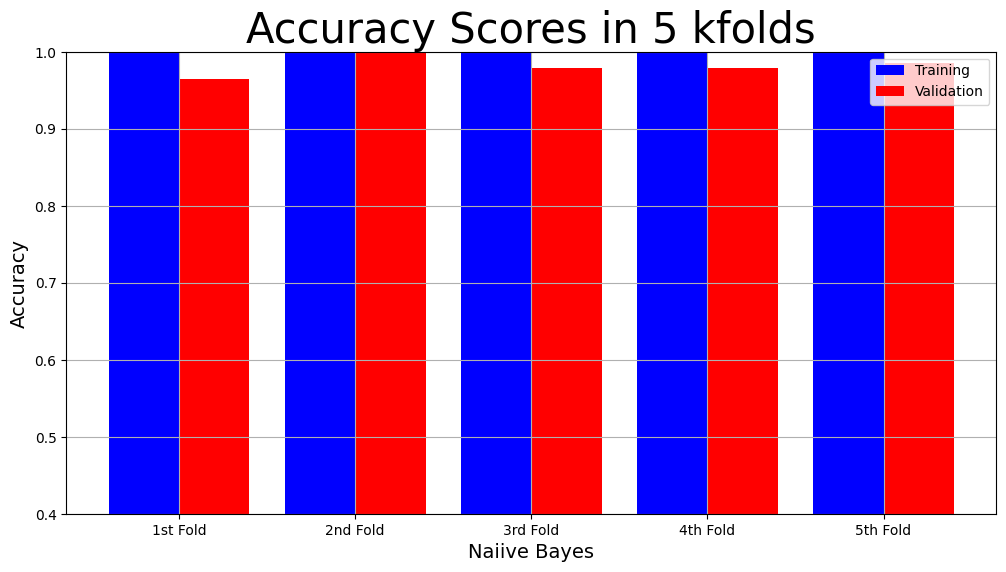

In [14]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
## Generate predictions with the best model


c = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=c).plot();
GaussianNB = cross_validation(nb,X_train, y_train, 5)
print(GaussianNB)
plot_result("Naiive Bayes", "Accuracy", "Accuracy Scores in 5 kfolds", GaussianNB['Training Accuracy scores'],  GaussianNB['Validation Accuracy scores'])

## 3-SVM Classifier Based on BOW

Accuracy: 0.9966666666666667
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.96428571, 1.        , 0.97857143, 0.97857143, 0.98571429]), 'Mean Validation Accuracy': 98.14285714285715}


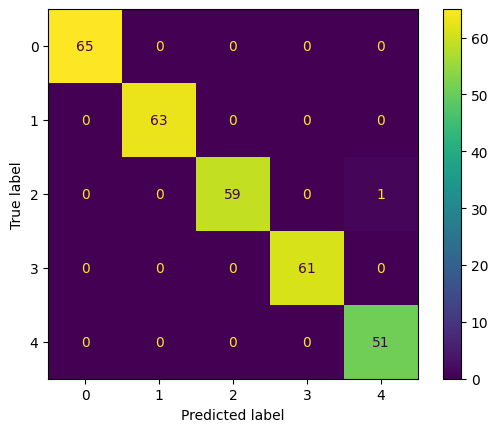

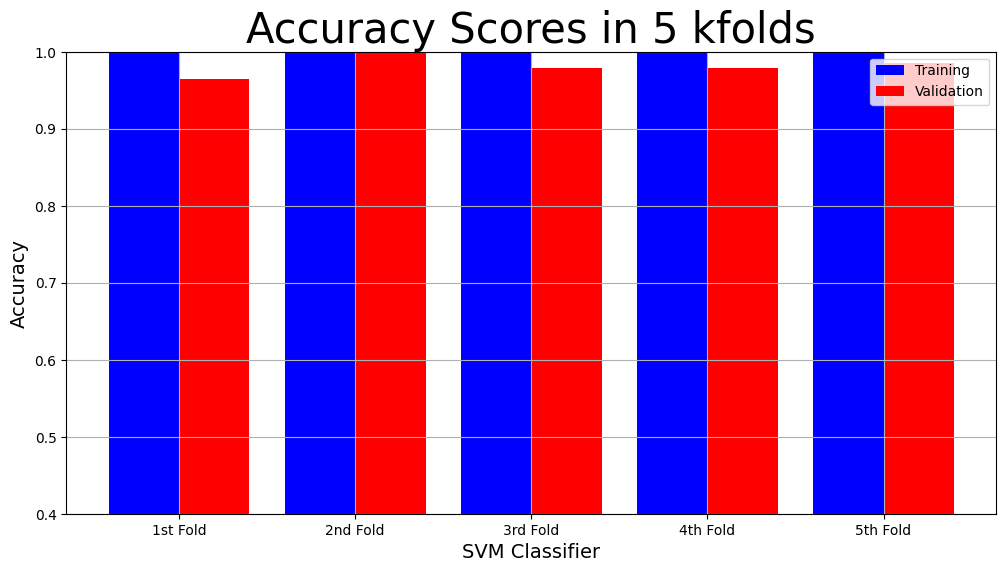

In [15]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

c = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=c).plot();
svm = cross_validation(nb,X_train, y_train, 5)
print( svm)
plot_result("SVM Classifier", "Accuracy", "Accuracy Scores in 5 kfolds",  svm['Training Accuracy scores'],   svm['Validation Accuracy scores'])

## 4-Knn Classifier Based on Bow






Accuracy: 0.8633333333333333
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.96428571, 1.        , 0.97857143, 0.97857143, 0.98571429]), 'Mean Validation Accuracy': 98.14285714285715}


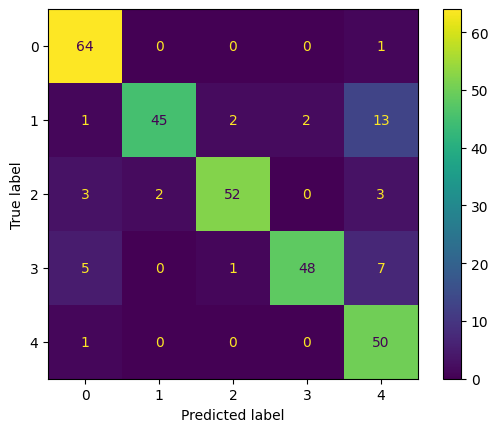

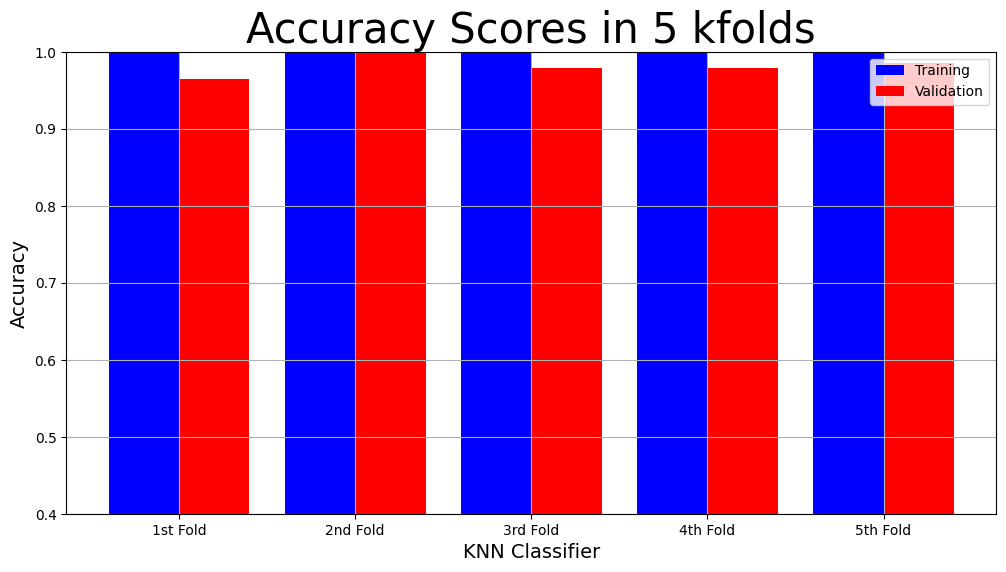

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
## Generate predictions with the best model


c = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=c).plot();
KNeighborsClassifier = cross_validation(nb,X_train, y_train, 5)
print( KNeighborsClassifier)
plot_result("KNN Classifier", "Accuracy", "Accuracy Scores in 5 kfolds",  KNeighborsClassifier['Training Accuracy scores'],   KNeighborsClassifier['Validation Accuracy scores'])
 

##5-Gradiant Boosting Classifier  Based on Bow


Accuracy: 0.9633333333333334
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.96428571, 1.        , 0.97857143, 0.97857143, 0.98571429]), 'Mean Validation Accuracy': 98.14285714285715}


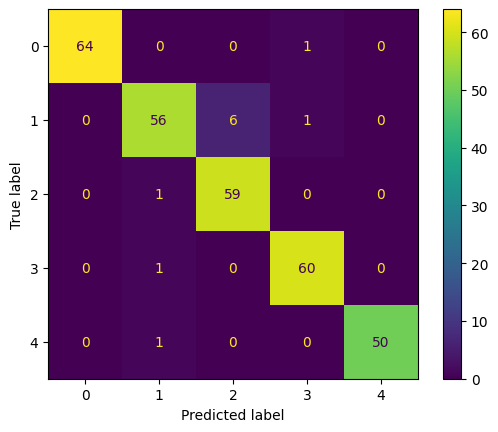

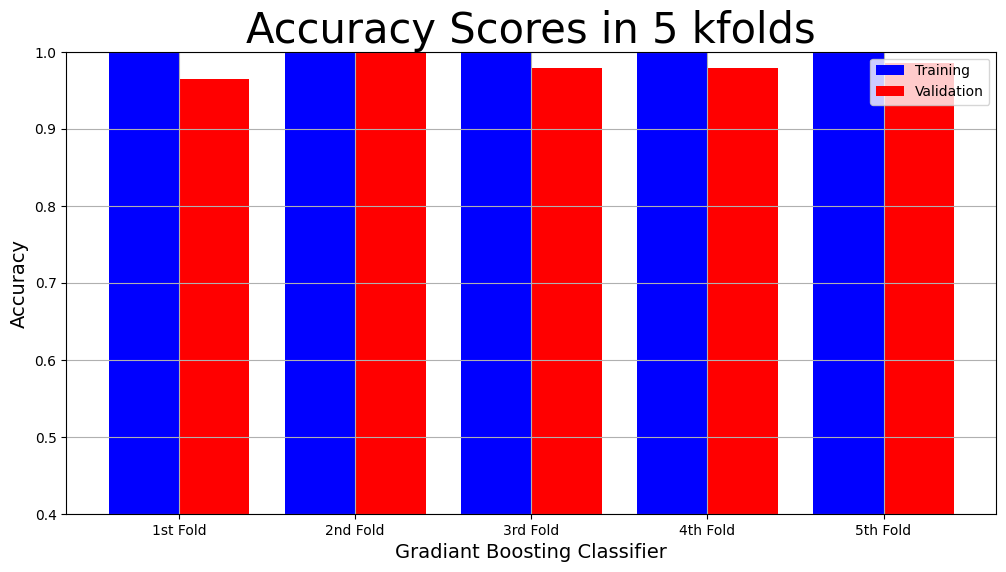

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train,y_train)
y_pred = GBC.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
## Generate predictions with the best model


c = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=c).plot();
GradientBoostingClassifier = cross_validation(nb,X_train, y_train, 5)
print( KNeighborsClassifier)
plot_result("Gradiant Boosting Classifier", "Accuracy", "Accuracy Scores in 5 kfolds",  GradientBoostingClassifier['Training Accuracy scores'],   GradientBoostingClassifier['Validation Accuracy scores'])
 


Accuracy: 0.9966666666666667


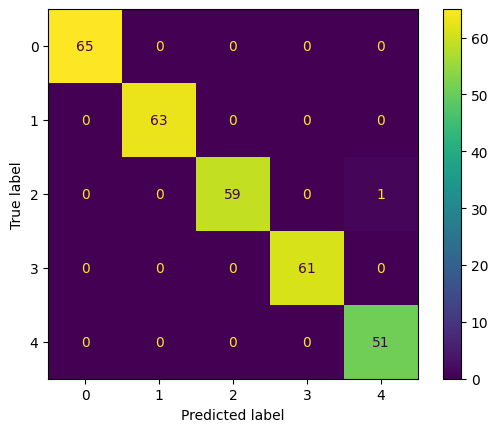

In [18]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

c = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=c).plot();

# TF-IDF


In [19]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['100_Words'])
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df

,abacus,abah,abandon,abandoned,abandonment,abashed,abbas,abbey,abbott,abbreviated,...,ziaret,zimmerman,zinde,zirab,zone,zonino,zoninus,zoological,zul,zum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
XX= tfidf.toarray()
yy = data['label']

print(XX.shape)
print(yy.shape)

# Split data to train and test
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size= 0.3, random_state= 42)

(1000, 13772)
(1000,)


##1-Random Forest Classifier based on TF-IDF

Accuracy: 0.98
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.96428571, 0.97142857, 0.95714286, 0.97142857, 0.97857143]), 'Mean Validation Accuracy': 96.85714285714285}


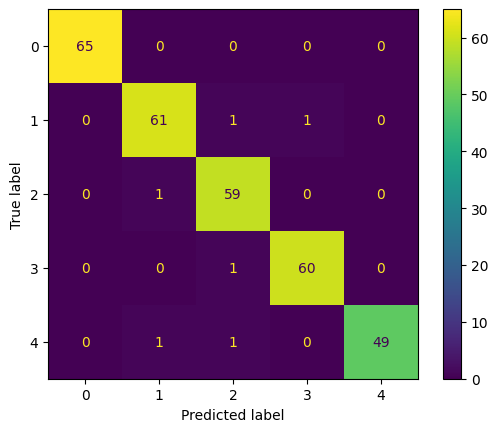

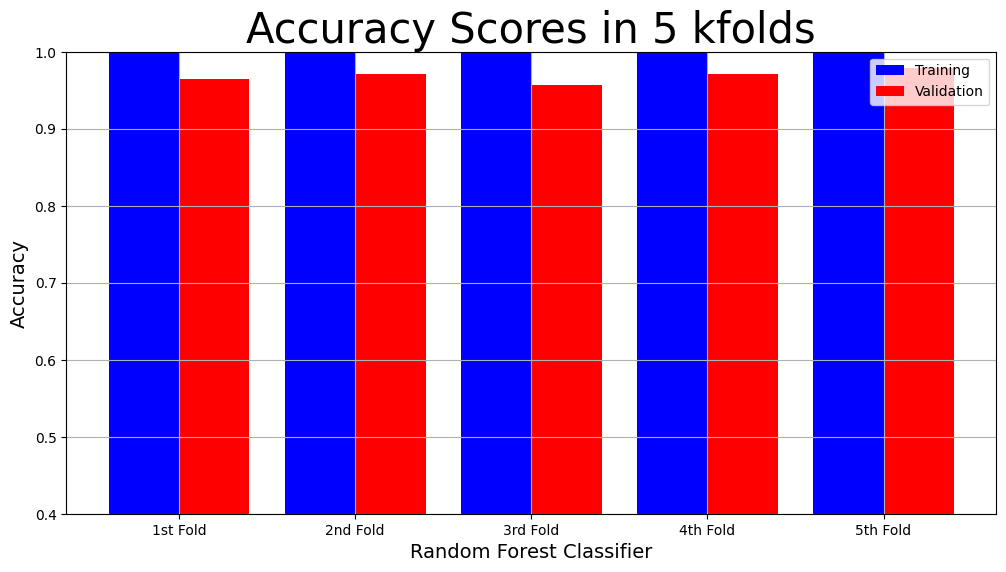

In [21]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(XX_train,  yy_train)
yy_pred = rf.predict(XX_test)
accuracy = accuracy_score(yy_test, yy_pred)
print("Accuracy:", accuracy)
## Generate predictions with the best model


cm = confusion_matrix(yy_test, yy_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();
RandomForestClassifier = cross_validation(nb,XX_train, yy_train, 5)
print( RandomForestClassifier)
plot_result("Random Forest Classifier", "Accuracy", "Accuracy Scores in 5 kfolds",  RandomForestClassifier['Training Accuracy scores'],   RandomForestClassifier['Validation Accuracy scores'])

## 2-Naiive Bayes Classifier Based on TF-IDF

Accuracy: 0.9733333333333334
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.96428571, 0.97142857, 0.95714286, 0.97142857, 0.97857143]), 'Mean Validation Accuracy': 96.85714285714285}


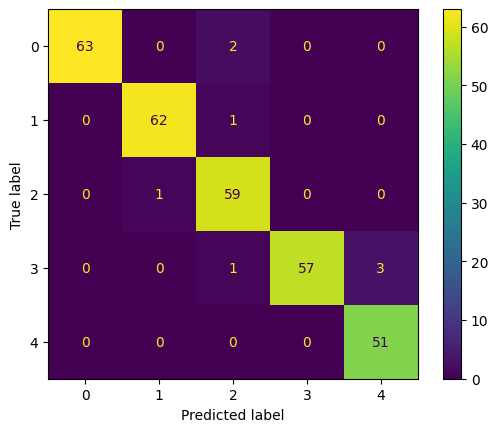

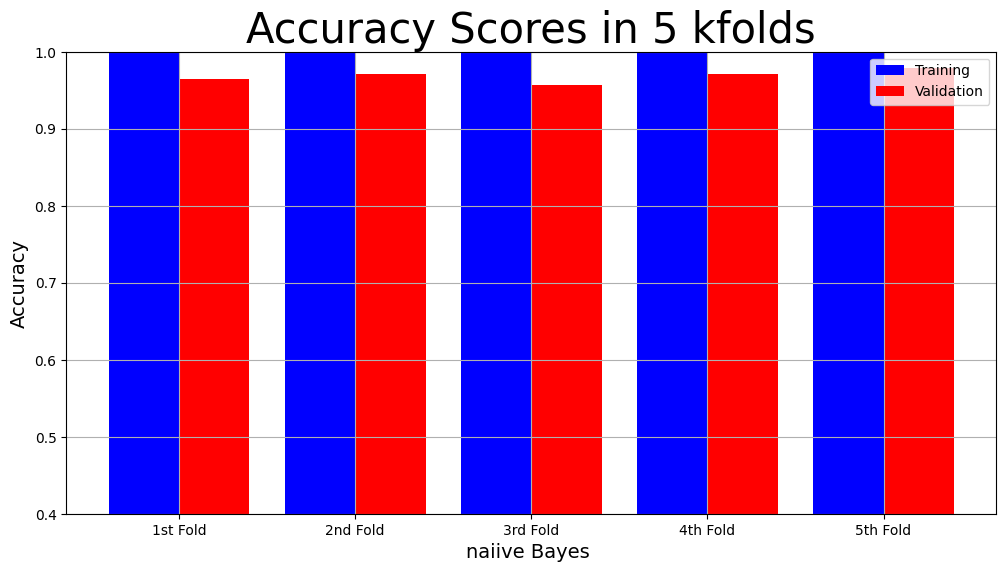

In [22]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(XX_train,yy_train)
yy_pred = nb.predict(XX_test)
accuracy = accuracy_score(yy_test, yy_pred)
print("Accuracy:", accuracy)
## Generate predictions with the best model


c = confusion_matrix(yy_test, yy_pred)

ConfusionMatrixDisplay(confusion_matrix=c).plot();
GaussianNB = cross_validation(nb,XX_train, yy_train, 5)
print( GaussianNB)
plot_result("naiive Bayes ", "Accuracy", "Accuracy Scores in 5 kfolds",  GaussianNB['Training Accuracy scores'],   GaussianNB['Validation Accuracy scores'])

## 3-SVM Classifier Based on TF-IDF


Accuracy: 0.9966666666666667
Precision Score :  0.9966666666666667
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.96428571, 0.97142857, 0.95714286, 0.97142857, 0.97857143]), 'Mean Validation Accuracy': 96.85714285714285}


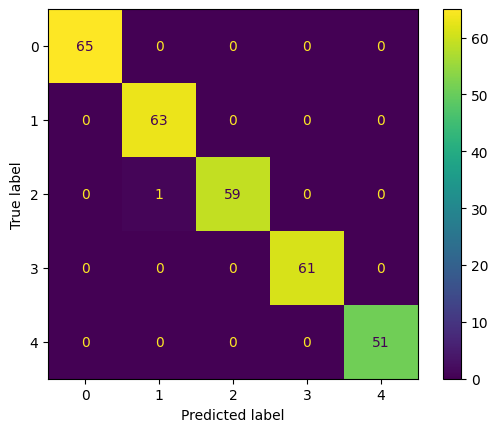

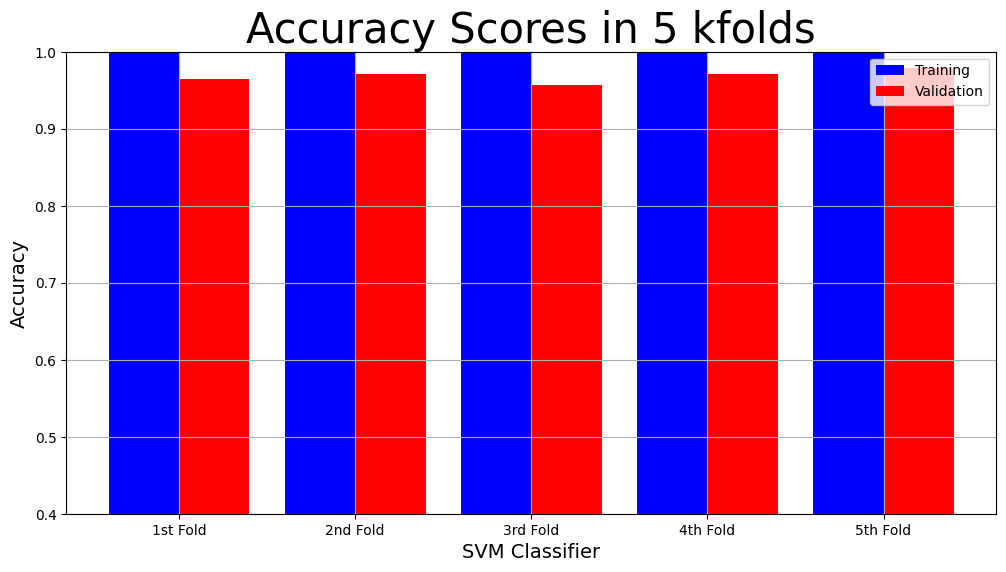

In [23]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(XX_train, yy_train)

#Predict the response for test dataset
yy_pred = clf.predict(XX_test)
accuracy = accuracy_score(yy_test, yy_pred)
print("Accuracy:", accuracy)
print("Precision Score : ", precision_score(yy_test, yy_pred, 
                                           
                                           average='micro'))

c = confusion_matrix(yy_test, yy_pred)

ConfusionMatrixDisplay(confusion_matrix=c).plot();
svm = cross_validation(nb,XX_train, yy_train, 5)
print( svm)
plot_result("SVM Classifier", "Accuracy", "Accuracy Scores in 5 kfolds",  svm['Training Accuracy scores'],   svm['Validation Accuracy scores'])

## 4-Knn Classifier Based on TF-IDF


Accuracy: 0.98
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.96428571, 0.97142857, 0.95714286, 0.97142857, 0.97857143]), 'Mean Validation Accuracy': 96.85714285714285}


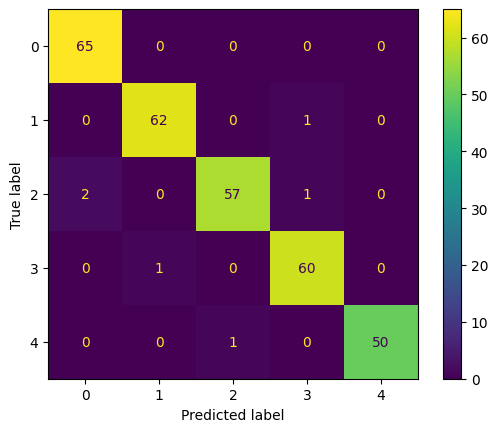

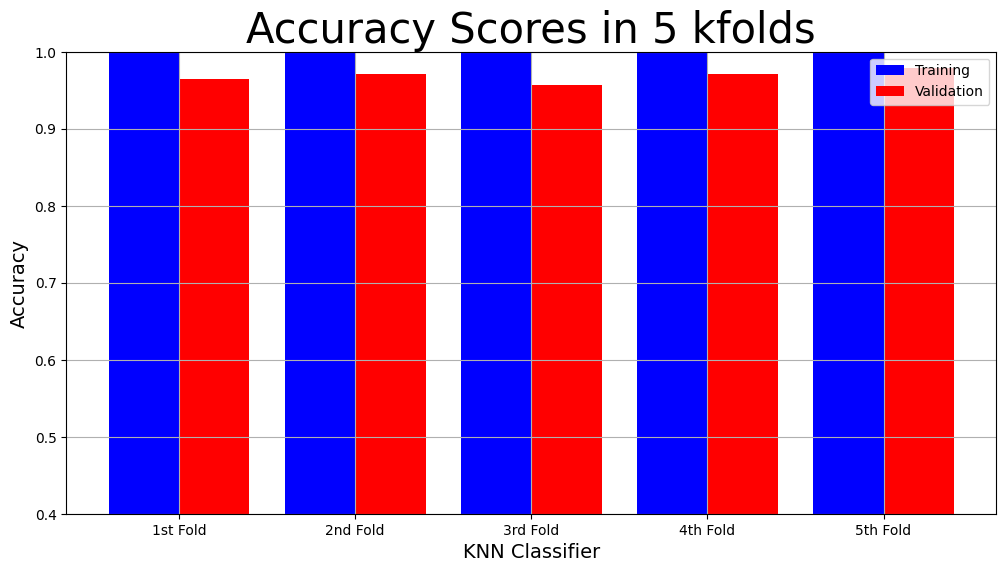

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(XX_train,yy_train)
yy_pred = knn.predict(XX_test)
accuracy = accuracy_score(yy_test, yy_pred)
print("Accuracy:", accuracy)
## Generate predictions with the best model


c = confusion_matrix(yy_test, yy_pred)

ConfusionMatrixDisplay(confusion_matrix=c).plot();
KNeighborsClassifier = cross_validation(nb,XX_train, yy_train, 5)
print( KNeighborsClassifier)
plot_result("KNN Classifier", "Accuracy", "Accuracy Scores in 5 kfolds",  KNeighborsClassifier['Training Accuracy scores'],   KNeighborsClassifier['Validation Accuracy scores'])

##5-Gradiant Boosting Classifier  Based on TF-IDF


Accuracy: 0.9633333333333334
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.96428571, 0.97142857, 0.95714286, 0.97142857, 0.97857143]), 'Mean Validation Accuracy': 96.85714285714285}


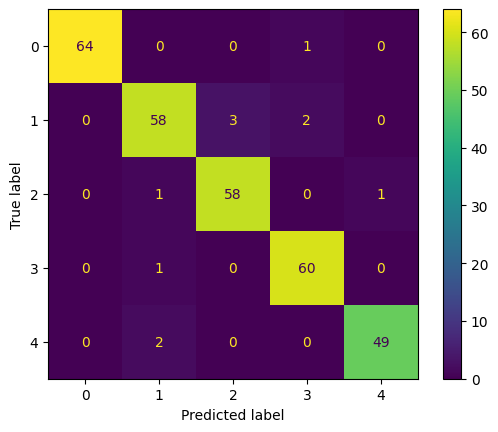

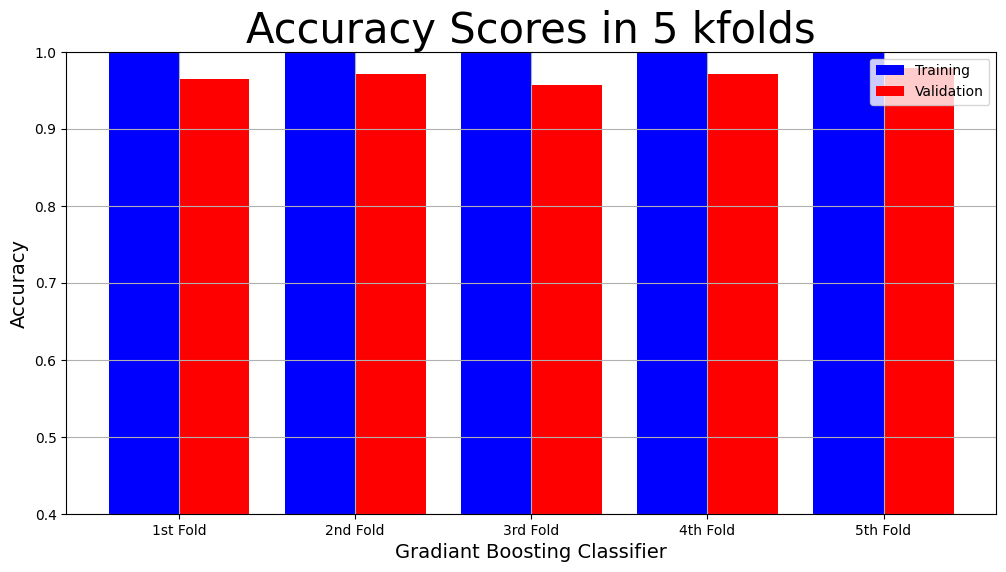

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(XX_train,yy_train)
yy_pred = GBC.predict(XX_test)
accuracy = accuracy_score(yy_test, yy_pred)
print("Accuracy:", accuracy)

c = confusion_matrix(yy_test, yy_pred)

ConfusionMatrixDisplay(confusion_matrix=c).plot();
GradientBoostingClassifier = cross_validation(nb,XX_train, yy_train, 5)
print( GradientBoostingClassifier)
plot_result("Gradiant Boosting Classifier", "Accuracy", "Accuracy Scores in 5 kfolds", GradientBoostingClassifier['Training Accuracy scores'],   GradientBoostingClassifier['Validation Accuracy scores'])

## The Champion Model





SVM with TF-IDF is the champion model as it has the highest acuracy (0.9933333333333333)


## N-GRAM

In [26]:
count_vect = CountVectorizer(ngram_range=(2,2))
ngram_vectors=count_vect.fit_transform(data["100_Words"])
df2 = pd.DataFrame(ngram_vectors.toarray(),columns=count_vect.get_feature_names_out())
df2

,abacus arithmetic,abacus fig,abah meccah,abandon coward,abandon desert,abandon kulkhan,abandon nobody,abandon seal,abandon way,abandoned child,...,zinde mosque,zirab came,zirab heften,zone necessarily,zone respective,zone whether,zonino accipis,zoninus rewarded,zul karnein,zum ausgang
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X = ngram_vectors.toarray()
Y = data['label']

print(X.shape)
print(Y.shape)

# Split data to train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

(1000, 85274)
(1000,)


##1- Random Forest Basedon N-gram

Accuracy: 0.58
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.89285714, 0.93571429, 0.92857143, 0.91428571, 0.92142857]), 'Mean Validation Accuracy': 91.85714285714285}


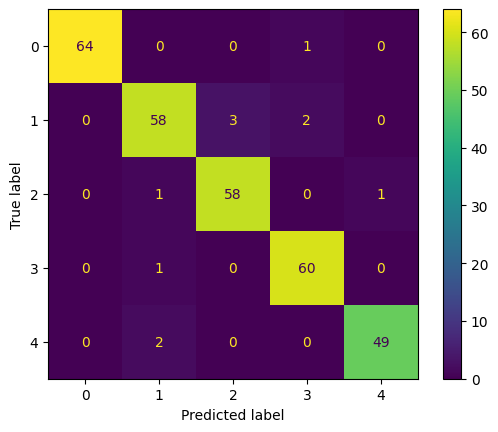

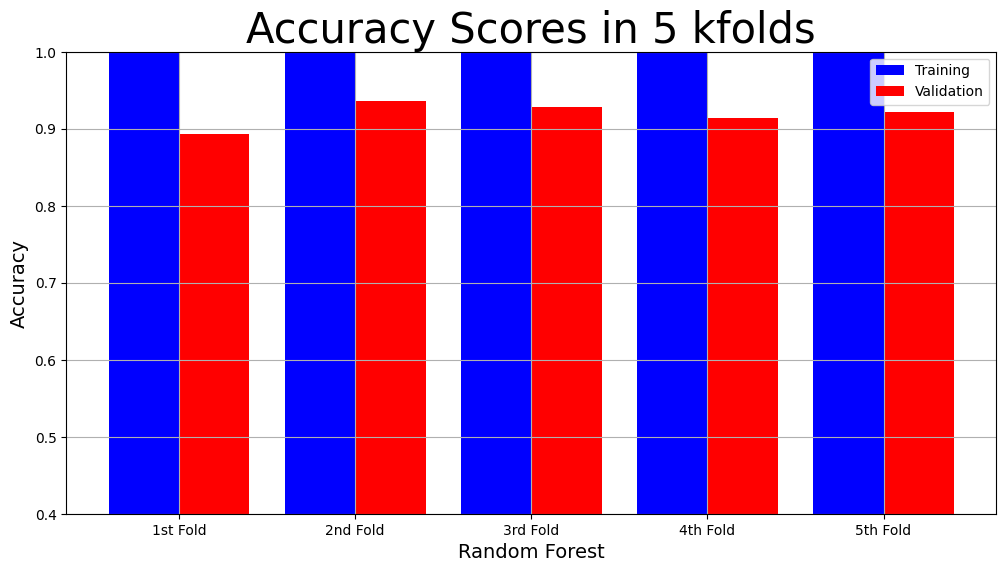

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X1_train,  y1_train)
y1_pred = rf.predict(X1_test)
accuracy = accuracy_score( y1_test, y1_pred)
print("Accuracy:", accuracy)
## Generate predictions with the best model


cm = confusion_matrix(yy_test, yy_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();
RandomForestClassifier = cross_validation(nb,X1_train,  y1_train, 5)
print( RandomForestClassifier)
plot_result("Random Forest", "Accuracy", "Accuracy Scores in 5 kfolds",  RandomForestClassifier['Training Accuracy scores'],   RandomForestClassifier['Validation Accuracy scores'])

## 2-Naiive Bayes Classifier Based on N-gram

Accuracy: 0.96
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.89285714, 0.93571429, 0.92857143, 0.91428571, 0.92142857]), 'Mean Validation Accuracy': 91.85714285714285}


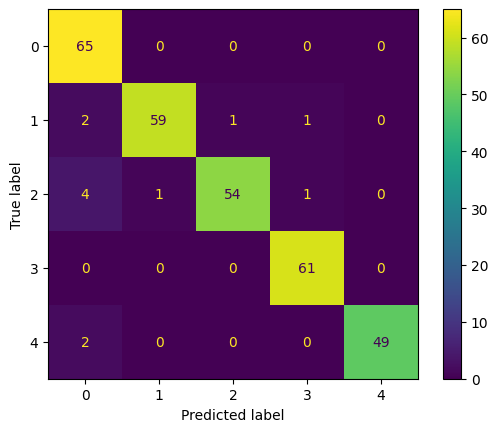

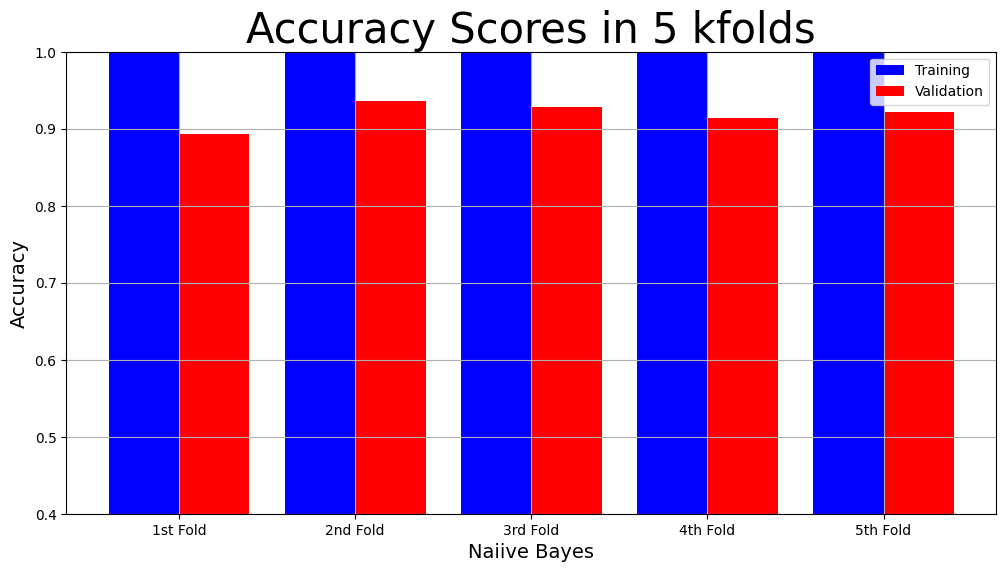

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X1_train,y1_train)
y1_pred = nb.predict(X1_test)
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)
## Generate predictions with the best model


c = confusion_matrix(y1_test, y1_pred)

ConfusionMatrixDisplay(confusion_matrix=c).plot();
GaussianNB = cross_validation(nb,X1_train, y1_train, 5)
print( GaussianNB)
plot_result("Naiive Bayes", "Accuracy", "Accuracy Scores in 5 kfolds",  GaussianNB['Training Accuracy scores'],   GaussianNB['Validation Accuracy scores'])

## 3-SVM Classifier Based on N-Gram

Accuracy: 0.9133333333333333
Precision Score :  0.9133333333333333
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.89285714, 0.93571429, 0.92857143, 0.91428571, 0.92142857]), 'Mean Validation Accuracy': 91.85714285714285}


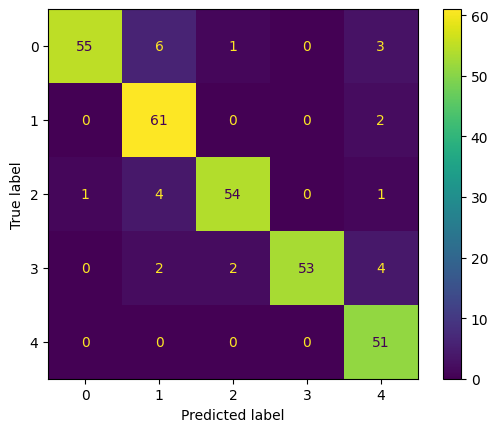

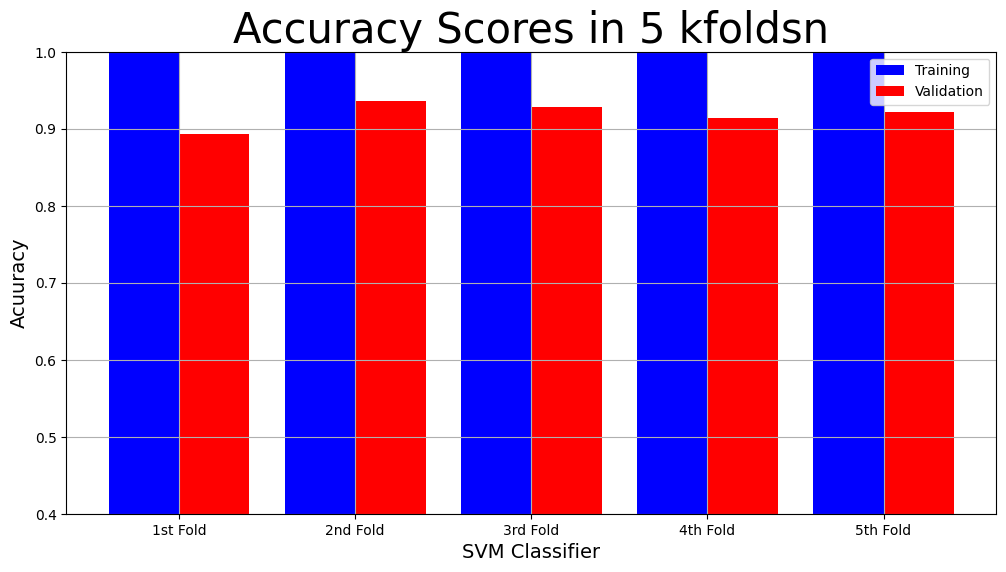

In [31]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X1_train, y1_train)

#Predict the response for test dataset
y1_pred = clf.predict(X1_test)
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)
print("Precision Score : ", precision_score(y1_test, y1_pred, 
                                           
                                           average='micro'))

c = confusion_matrix(y1_test, y1_pred)

ConfusionMatrixDisplay(confusion_matrix=c).plot();
svm = cross_validation(nb,X1_train, y1_train, 5)
print( svm)
plot_result("SVM Classifier", "Acuuracy", "Accuracy Scores in 5 kfoldsn",  svm['Training Accuracy scores'],   svm['Validation Accuracy scores'])

## 4-KNN Classifier Based on N-Gram 



Accuracy: 0.87
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.89285714, 0.93571429, 0.92857143, 0.91428571, 0.92142857]), 'Mean Validation Accuracy': 91.85714285714285}


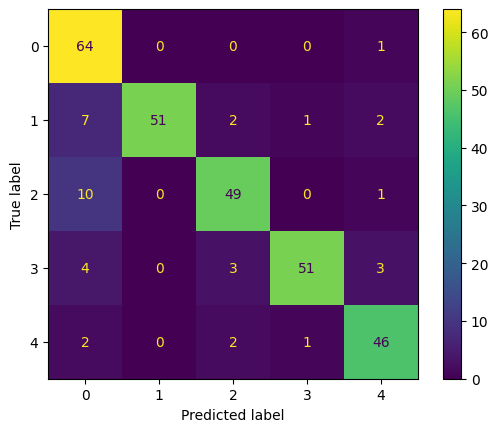

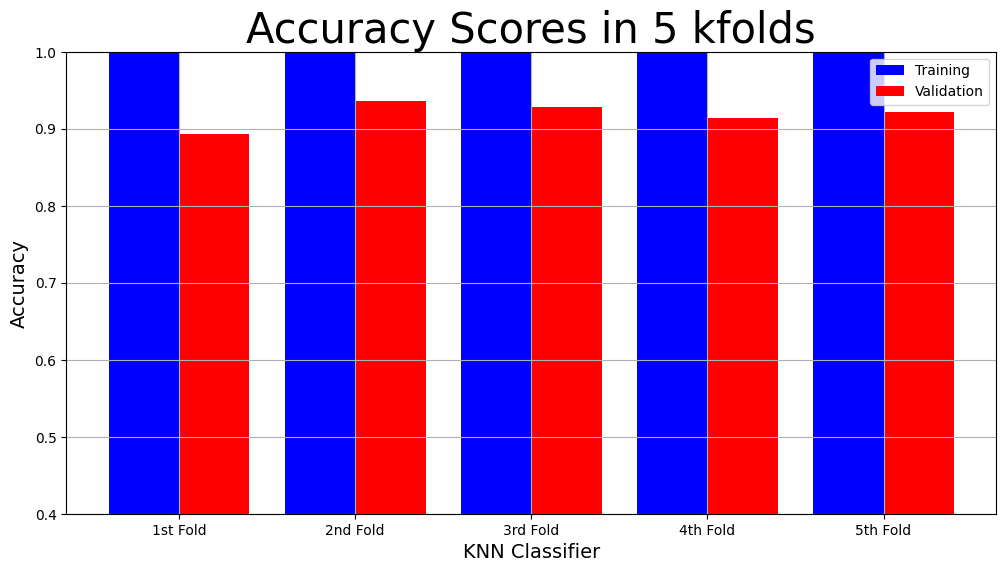

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X1_train,y1_train)
y1_pred = knn.predict(X1_test)
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)
## Generate predictions with the best model


c = confusion_matrix(y1_test, y1_pred)

ConfusionMatrixDisplay(confusion_matrix=c).plot();
KNeighborsClassifier = cross_validation(nb,X1_train, y1_train, 5)
print( KNeighborsClassifier)
plot_result("KNN Classifier", "Accuracy", "Accuracy Scores in 5 kfolds",  KNeighborsClassifier['Training Accuracy scores'],   KNeighborsClassifier['Validation Accuracy scores'])

## 5-Gradient Boosting Classifier Based on N-gram

Accuracy: 0.7733333333333333
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.89285714, 0.93571429, 0.92857143, 0.91428571, 0.92142857]), 'Mean Validation Accuracy': 91.85714285714285}


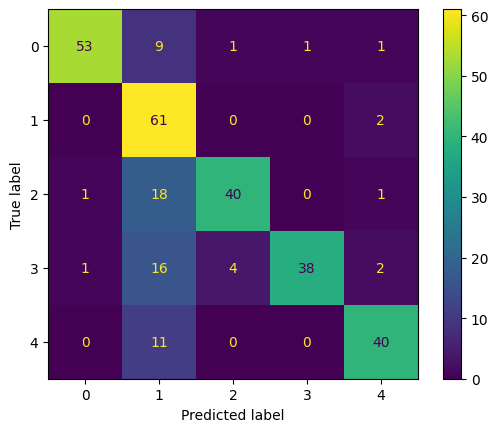

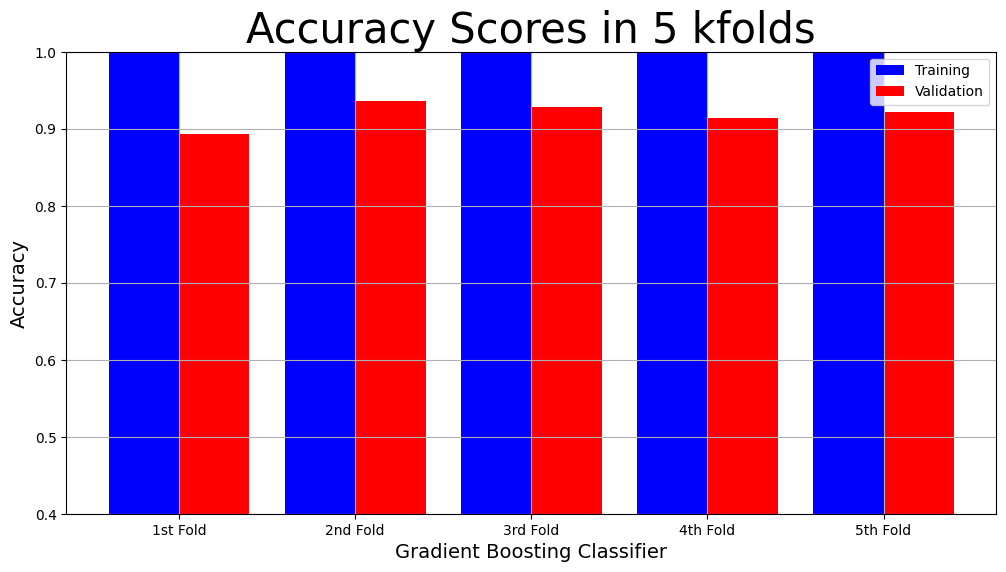

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X1_train,y1_train)
y1_pred = GBC.predict(X1_test)
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)

c = confusion_matrix(y1_test, y1_pred)

ConfusionMatrixDisplay(confusion_matrix=c).plot();
GradientBoostingClassifier = cross_validation(nb,X1_train, y1_train, 5)
print( GradientBoostingClassifier)
plot_result("Gradient Boosting Classifier", "Accuracy", "Accuracy Scores in 5 kfolds", GradientBoostingClassifier['Training Accuracy scores'],   GradientBoostingClassifier['Validation Accuracy scores'])

## Visualizing Top 20 words

<Axes: title={'center': 'Top 20 words'}, xlabel='word'>

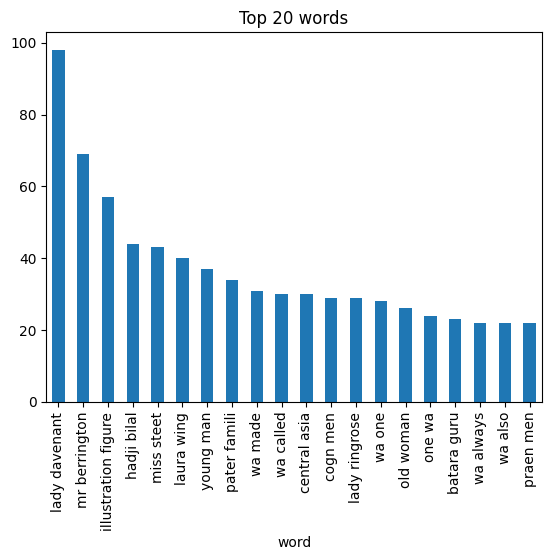

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['100_Words'], 20)
#for word, freq in common_words:
    #print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df1.groupby('word').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 20 words')

## Error Anakysis 

Accuracy: 0.5766666666666667
{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.96428571, 0.97142857, 0.95714286, 0.97142857, 0.97857143]), 'Mean Validation Accuracy': 96.85714285714285}


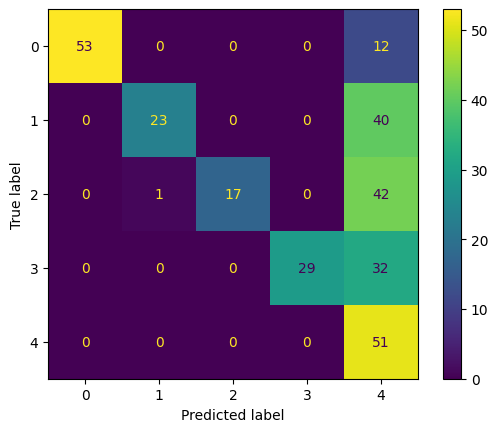

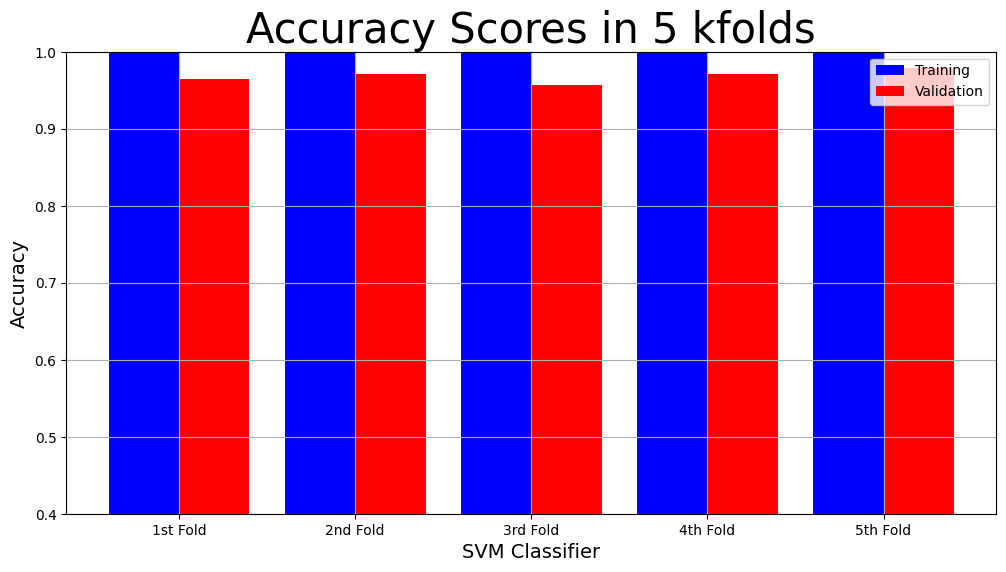

In [35]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Poly Kernel

#Train the model using the training sets
clf.fit(XX_train, yy_train)

#Predict the response for test dataset
yy_pred = clf.predict(XX_test)
accuracy = accuracy_score(yy_test, yy_pred)
print("Accuracy:", accuracy)

c = confusion_matrix(yy_test, yy_pred)

ConfusionMatrixDisplay(confusion_matrix=c).plot();
svm = cross_validation(nb,XX_train, yy_train, 5)
print( svm)
plot_result("SVM Classifier", "Accuracy", "Accuracy Scores in 5 kfolds",  svm['Training Accuracy scores'],   svm['Validation Accuracy scores'])

## TSNE Projection 

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


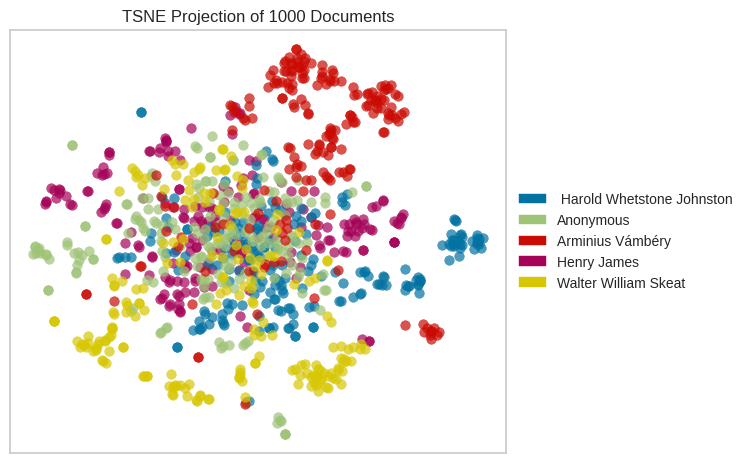

In [36]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(df2,data["Authors"])

tsne.show(legend=["Author 1","Author 2"])
plt.show()

## Bert transformer

In [78]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.5 MB/s eta 0:00:00


In [79]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Encode the text to be classified
df2=
encoded_text = tokenizer.encode_plus(df2, add_special_tokens=True, return_tensors='pt')

# Make predictions using the model
outputs = model(encoded_text['input_ids'], encoded_text['attention_mask'])
predictions = outputs.logits.argmax(dim=1)

# Print the predicted label
print(predictions.item())

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

ValueError: ignored